# Deep Learning Cats and Dogs Project

In [ ]:
import os, shutil

#Directory in which we store our dataset
original_dataset_dir = './dataset'

base_dir = './new_set'
#os.mkdir(base_dir)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers

# Task 1 - Dataset

In [ ]:
# importing os: The main purpose of the OS module is to interact with the operating system. You can for example use it to create folders, 
# remove folders, move folders, and sometimes change the working directory.

import os, shutil

#Create directories and link them together

# The os.path.join() function constructs a pathname
# os.mkdir is used to make a new directory for train, test and validation splits

train_dir = os.path.join(base_dir,'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [ ]:
#We seperate our data in to training, validation and testset

# The following commands creates the paths and stores the data: 

# We have 1500 images of cats and 1500 images of dogs. The 1500 images are split in half to optain 
# 750 images for training set, the rest of the 750 images are split in half so we optain 375 images for validation 
# and 375 for test set.


fnames = ['cat.{}.jpg'.format(i) for i in range(0,750)]
for fname in fnames:
    src = os.path. join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(750, 1125)]
for fname in fnames:
    src = os.path. join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1125, 1500)]
for fname in fnames:
    src = os.path. join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(750)]
for fname in fnames:
    src = os.path. join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(750, 1125)]
for fname in fnames:
    src = os.path. join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    fnames = ['dog.{}.jpg'.format(i) for i in range(1125, 1500)]
for fname in fnames:
    src = os.path. join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# The following commands counts how many pictures are in each training split (train/validation/test):
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 750
total training cat images: 750
total training cat images: 375
total training cat images: 375
total training cat images: 375
total training cat images: 375


# Task 3 - Constructing the network

### Constructing a neural network:

In this step we build the convnet model. The structure of the network is a stack of alternated Conv2D and MaxPooling2D layers. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so they are not overly large when we reach the Flatten layer. A convnet takes as input tensors of shape (image_height, image_width, image_channels). In this case, we’ll configure the convnet to process inputs of size (150, 150, 3). We will do this by passing the argument input_shape=(150, 150, 3) to the first layer. Since the image is in RGB format, the number of channels is set to 3. The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels).

The hidden layers in our convnet model are generally convolution layers but also pooling layers, which are used to downsample the image. We will be working with MaxPooling. The image contains a lot of pixel values, it is typically easier for the network to learn the features if the image size is reduced. Pooling also helps in avoiding overfitting. Our model switches between a filter size of (2,2) and (3,3) for the pooling layer to obtain a binary output. 

In each convolution layer, there is a filter of a small size which is moved across the image and performs convolution operations. The operations are element-wise matrix multiplication between the filter values and the pixels in the image. The filter’s values are tuned through the iterative process of training and after a neural net has trained for certain number of epochs, these filters start to look out for various features in the image. We have chosen to use (3,3) as a size of the filters which was the size that gave the best accuracy. 

We use ReLU function, which is a non-linear activation function and the main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time. This means that the neurons will only be deactivated if the output of the linear transformation is less than 0.For the negative input values, the result is zero, that means the neuron does not get activated.

We have also added one dropout layer before the flatten layer with a dropout rate of 0.5 to prevent overfitting and this was the value with the best accuracy. 

Since we are dealing with a binary-classification problem, the end of the network will have a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

We compile the model and train it with the optimizer RMSprop and the learning rate 1e-4 as this was the optimizer and value with the best accuracy compared to SDG and adam.

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 74, 74, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 128)      

# Task 2 - Creating the datagenerators

### Training the convnet using dataaugmentation generators
In this step we fit the model using image data augmentation via the ImageDataGenerator class and improve the performance of our neural network. The technique artificially creates new training data from existing training data. It involves creating transformed versions of images in the training dataset that belongs to the same class as the original image. Transforms include a range of operations such as shifts, flips, zooms, and much more.

We use Keras library which provides the ability to use data augmentation automatically when training a model. This is achieved by using the ImageDataGenerator class. A range of techniques are supported, as well as pixel scaling methods. We will focus on nine main types of data augmentation techniques for image data. We will illustrate one of these in the end.

# Epochs 350

In [ ]:
batch=16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode = 'nearest',
    channel_shift_range=13,
    data_format='channels_last',
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=1500//batch,
    epochs=350,
    validation_data=validation_generator,
    validation_steps=46) 

Found 1500 images belonging to 2 classes.
Found 750 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 93 steps, validate for 46 steps
Epoch 1/350
93/93 [==============================] - 16s 170ms/step - loss: 0.6932 - acc: 0.5108 - val_loss: 0.6915 - val_acc: 0.5122
Epoch 2/350
93/93 [==============================] - 15s 160ms/step - loss: 0.6896 - acc: 0.5168 - val_loss: 0.6847 - val_acc: 0.5516
Epoch 3/350
93/93 [==============================] - 15s 158ms/step - loss: 0.6846 - acc: 0.5573 - val_loss: 0.7235 - val_acc: 0.4932
Epoch 4/350
93/93 [==============================] - 16s 167ms/step - loss: 0.6788 - acc: 0.5573 - val_loss: 0.6747 - val_acc: 0.5380
Epoch 5/350
93/93 [==============================] - 16s 172ms/step - loss: 0.6693 - acc: 0.5849 - val_loss: 0.6737 - val_acc: 0.5707
Epoch 6/350
93/93 [==============================] - 17s 179ms/step - loss: 0.6665 - acc: 0.5896 - val_loss: 0.6818 - val_acc: 0.5394
Epoch 7/350
93/93 [==

93/93 [==============================] - 14s 154ms/step - loss: 0.3823 - acc: 0.8255 - val_loss: 0.4138 - val_acc: 0.8179
Epoch 120/350
93/93 [==============================] - 15s 161ms/step - loss: 0.3681 - acc: 0.8356 - val_loss: 0.4539 - val_acc: 0.7921
Epoch 121/350
93/93 [==============================] - 14s 156ms/step - loss: 0.3612 - acc: 0.8430 - val_loss: 0.5176 - val_acc: 0.7976
Epoch 122/350
93/93 [==============================] - 15s 159ms/step - loss: 0.3589 - acc: 0.8450 - val_loss: 0.4372 - val_acc: 0.8098
Epoch 123/350
93/93 [==============================] - 15s 159ms/step - loss: 0.3626 - acc: 0.8484 - val_loss: 0.4273 - val_acc: 0.8111
Epoch 124/350
93/93 [==============================] - 15s 165ms/step - loss: 0.3476 - acc: 0.8592 - val_loss: 0.4439 - val_acc: 0.8016
Epoch 125/350
93/93 [==============================] - 16s 169ms/step - loss: 0.3609 - acc: 0.8376 - val_loss: 0.4466 - val_acc: 0.8139
Epoch 126/350
93/93 [==============================] - 15s 166

93/93 [==============================] - 18s 197ms/step - loss: 0.2246 - acc: 0.9178 - val_loss: 0.4534 - val_acc: 0.8261
Epoch 240/350
93/93 [==============================] - 18s 196ms/step - loss: 0.2477 - acc: 0.8962 - val_loss: 0.4213 - val_acc: 0.8465
Epoch 241/350
93/93 [==============================] - 18s 191ms/step - loss: 0.2449 - acc: 0.9023 - val_loss: 0.3866 - val_acc: 0.8410
Epoch 242/350
93/93 [==============================] - 18s 190ms/step - loss: 0.2412 - acc: 0.9036 - val_loss: 0.4906 - val_acc: 0.8451
Epoch 243/350
93/93 [==============================] - 18s 194ms/step - loss: 0.2495 - acc: 0.9043 - val_loss: 0.4443 - val_acc: 0.8438
Epoch 244/350
93/93 [==============================] - 18s 190ms/step - loss: 0.2258 - acc: 0.9090 - val_loss: 0.4598 - val_acc: 0.8288
Epoch 245/350
93/93 [==============================] - 18s 189ms/step - loss: 0.2385 - acc: 0.8982 - val_loss: 0.5419 - val_acc: 0.8084
Epoch 246/350
93/93 [==============================] - 18s 191

In [ ]:
model.save('cats_vs_dogs_good853.h5')

In [ ]:
model_reloaded = tf.keras.models.load_model('cats_vs_dogs_good85.h5')

# Task 4 - Visualizing your results

### Visualizing model performance
After training the model, we evaluate the loss and accuracy of the model on the test data by plotting training accuracy together with validation accuracy, which will tell us how accurate the model's prediction is compared to the true data. And plotting training loss together with validation loss and its interpretation is based on how well the model is doing in these two sets.

The learning curve as seen in the plots below is calculated from the training dataset that gives an idea of how well the model is learning. The validation curve is calculated from a hold-out validation dataset that gives an idea of how well the model is generalizing.

We use the visualization to see whether the model overfits. Since the slope in general is not negative, it is not overfitting. 

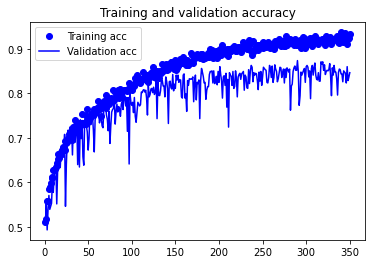

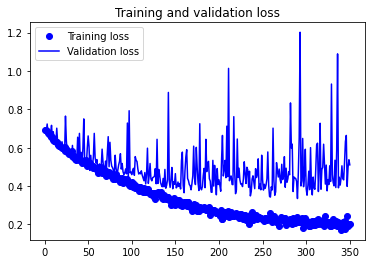

In [ ]:
#visualization of accurazy and loss
import matplotlib.pyplot as plt

def draw():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)


    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    return model

draw()

In [ ]:
#Test accuracy 
test_datagen = ImageDataGenerator(rescale=1./255) 

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=46)
print('test acc:', test_acc)

Found 750 images belonging to 2 classes.
  ...
    to  
  ['...']
test acc: 0.86277175
